In [1]:
#affine_models.ipynb
#Solve affine models, pick parameter values

# NYU course ECON-UB 233, Macro foundations for asset pricing.

# Written by: Michael Cai for Dave Backus

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

Vasicek model
Data input
autocorr_f0 = 0.959000
var_f0 = 0.000005
Ef0 = 0.005569, Ef120 = 0.007382, Efp120 = 0.001813
 
Parameter values
Forward rate regression coefficient b1


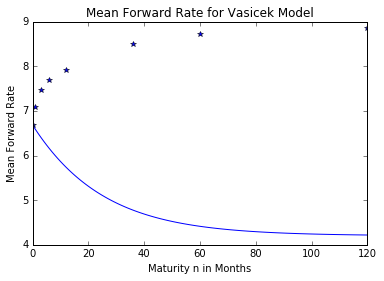

In [76]:
print('Vasicek model')

#Inputs
print('Data input')
autocorr_f0 = 0.959 
print('autocorr_f0 = %f'%autocorr_f0)
var_f0 = (2.703/1200)**2
print('var_f0 = %f' %var_f0)
Ef0 = 6.683/1200 
Ef120 = 8.858/1200
Efp120 = Ef120 - Ef0 
print('Ef0 = %f, Ef120 = %f, Efp120 = %f'%(Ef0,Ef120,Efp120))

#Parameters and recursions
 
print(' ')
print('Parameter values')  
phi = autocorr_f0
sigma = sqrt((1-phi**2)*var_f0)    #  note sign convention 
lambda_ = -0.125
delta = -Ef0 - lambda_**2/2; 

#Initializations
maxmat = 122
A = np.zeros((maxmat,1))
B = np.zeros((maxmat,1)) 
A[0] = 0
B[0] = 0

for mat in np.arange(1,maxmat):
    #NB: maturities start at n=0, makes initial conditions simple
    A[mat] = A[mat-1] + delta + (lambda_ + B[mat-1]*sigma)**2/2
    B[mat] = phi*B[mat-1] - 1


Adiff = np.diff(A, n=1, axis=0)
Bdiff = np.diff(B, n=1, axis=0)

print('Forward rate regression coefficient b1')
b1 = (phi-1)/(Bdiff[0]-Bdiff[1])

f_bar = -Adiff
imatf = np.arange(0,maxmat-1)

imatsome = np.array([0,1,3,6,12,36,60,120]).T
f_data = np.array([6.683,7.098,7.469,7.685,7.921,8.498,8.714,8.858]).T

#Figures
plt.plot(imatf, 1200*f_bar)
plt.plot(imatsome,f_data, 'b*')
plt.title('Mean Forward Rate for Vasicek Model')
plt.xlabel('Maturity n in Months')
plt.ylabel('Mean Forward Rate')

Cox-Ingersoll-Ross model
Data input
Parameter values
Forward rate regression coefficient b1


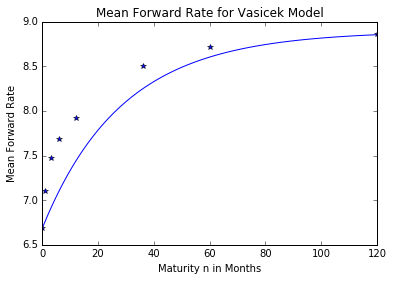

In [77]:
print('Cox-Ingersoll-Ross model')

#Inputs
print('Data input')
autocorr_f0 = 0.959 
var_f0 = (2.73/1200)**2
Ef0 = 6.683/1200 
Ef120 = 8.858/1200
Efp120 = Ef120 - Ef0

#Parameters and recursions
print('Parameter values')
phi = autocorr_f0
delta = Ef0
sigma = sqrt((1-phi**2)*var_f0/delta)
lambda_ = 1.32

#Initializations
maxmat = 122
A = np.zeros((maxmat,1))
B = np.zeros((maxmat,1)) 
A[0] = 0
B[0] = 0

for mat in np.arange(1,maxmat):
    A[mat] = A[mat-1] + B[mat-1]*(1-phi)*delta
    B[mat] = phi*B[mat-1] - (1+lambda_**2/2) + (lambda_+B[mat-1]*sigma)**2/2

Adiff = np.diff(A, n=1, axis=0)
Bdiff = np.diff(B, n=1, axis=0)

print('Forward rate regression coefficient b1')
b1 = (phi-1)/(Bdiff[0]-Bdiff[1])

f_bar = -Adiff - Bdiff*delta
imatf = np.arange(0,maxmat-1)

imatsome = np.array([0,1,3,6,12,36,60,120]).T
f_data = np.array([6.683,7.098,7.469,7.685,7.921,8.498,8.714,8.858]).T

#Figures
plt.plot(imatf, 1200*f_bar)
plt.plot(imatsome,f_data, 'b*')
plt.title('Mean Forward Rate for Vasicek Model')
plt.xlabel('Maturity n in Months')
plt.ylabel('Mean Forward Rate')

Another affine model
Data input
Parameter values
Forward rate regression coefficient b1


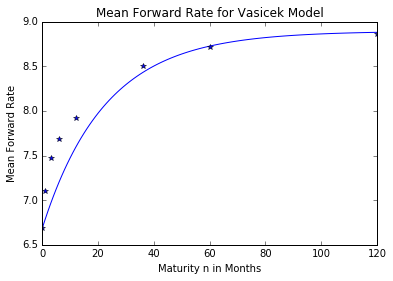

In [78]:
print('Another affine model')

#Inputs

print('Data input')
autocorr_f0 = 0.959 
var_f0 = (2.73/1200)**2
Ef0 = 6.683/1200 
Ef120 = 8.858/1200
Efp120 = Ef120 - Ef0

#Parameters and recursions
print('Parameter values')
phi = autocorr_f0
delta = -Ef0
sigma = sqrt((1-phi**2)*var_f0)
lambda1 = 0
lambda0 = 0.125

#Initializations
maxmat = 122
A = np.zeros((maxmat,1))
B = np.zeros((maxmat,1)) 
A[0] = 0
B[0] = 0

for mat in np.arange(1,maxmat):
    A[mat] = A[mat-1] + delta + (B[mat-1]*sigma)**2/2 + B[mat-1]*sigma*lambda0;
    B[mat] = phi*B[mat-1] - 1 + B[mat-1]*sigma*lambda1;

Adiff = np.diff(A, n=1, axis=0)
Bdiff = np.diff(B, n=1, axis=0)

print('Forward rate regression coefficient b1')
b1 = (phi-1)/(Bdiff[0]-Bdiff[1])

f_bar = -Adiff
imatf = np.arange(0,maxmat-1)

imatsome = np.array([0,1,3,6,12,36,60,120]).T
f_data = np.array([6.683,7.098,7.469,7.685,7.921,8.498,8.714,8.858]).T

#Figures
plt.plot(imatf, 1200*f_bar)
plt.plot(imatsome,f_data, 'b*')
plt.title('Mean Forward Rate for Vasicek Model')
plt.xlabel('Maturity n in Months')
plt.ylabel('Mean Forward Rate')